In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Thurs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from imblearn.over_sampling import SMOTE

In [78]:
df=pd.read_csv("Lab/Data/DATA_Customer-Churn.csv")

In [79]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Round 1

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
 - Split the data into a training set and a test set.
 - Scale the features either by using normalizer or a standard scaler.
 - (optional)Fit a logistic Regression model on the training data.
 - Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [11]:
list(df["TotalCharges"].unique())

['29.85',
 '1889.5',
 '108.15',
 '1840.75',
 '151.65',
 '820.5',
 '1949.4',
 '301.9',
 '3046.05',
 '3487.95',
 '587.45',
 '326.8',
 '5681.1',
 '5036.3',
 '2686.05',
 '7895.15',
 '1022.95',
 '7382.25',
 '528.35',
 '1862.9',
 '39.65',
 '202.25',
 '20.15',
 '3505.1',
 '2970.3',
 '1530.6',
 '4749.15',
 '30.2',
 '6369.45',
 '1093.1',
 '6766.95',
 '181.65',
 '1874.45',
 '20.2',
 '45.25',
 '7251.7',
 '316.9',
 '3548.3',
 '3549.25',
 '1105.4',
 '475.7',
 '4872.35',
 '418.25',
 '4861.45',
 '981.45',
 '3906.7',
 '97',
 '144.15',
 '4217.8',
 '4254.1',
 '3838.75',
 '1426.4',
 '1752.65',
 '633.3',
 '4456.35',
 '1752.55',
 '6311.2',
 '7076.35',
 '894.3',
 '7853.7',
 '4707.1',
 '5450.7',
 '2962',
 '957.1',
 '857.25',
 '244.1',
 '3650.35',
 '2497.2',
 '930.9',
 '887.35',
 '49.05',
 '1090.65',
 '7099',
 '1424.6',
 '177.4',
 '6139.5',
 '2688.85',
 '482.25',
 '2111.3',
 '1216.6',
 '79.35',
 '565.35',
 '496.9',
 '4327.5',
 '973.35',
 '918.75',
 '2215.45',
 '1057',
 '927.1',
 '1009.25',
 '2570.2',
 '74.7',

In [ ]:
df["TotalCharges"].value_counts()[" "]

In [80]:
lol=[x for x in df["TotalCharges"] if len(x)>1]
lol=list(map(float,lol))
avg=sum(lol)/len(lol)
avg

2283.3004408418697

In [81]:
new=[x for x in df["TotalCharges"]]
for i,val in enumerate([x for x in df["TotalCharges"]]):
    if val == " ":
        new[i]=avg
    else:
        continue

In [82]:
df["TotalCharges"] = new


In [83]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [87]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

It seems there are no NaN values

tenure, SeniorCitizen, MonthlyCharges and TotalCharges

In [96]:
X=df[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges"]]

In [97]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [99]:
y=df["Churn"]
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=42)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

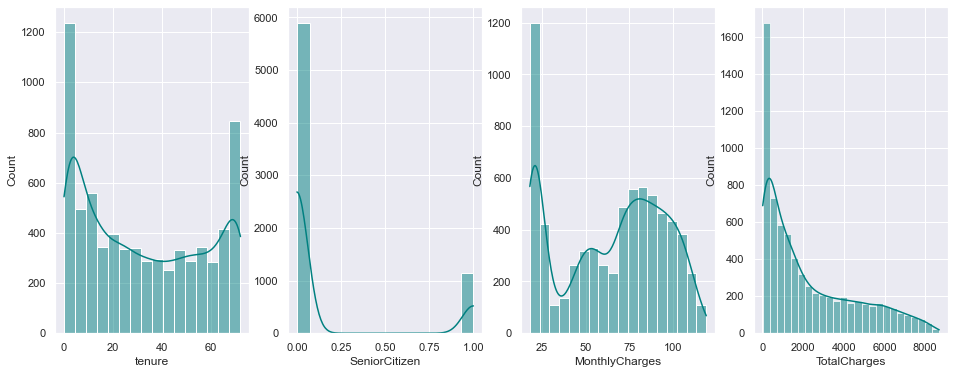

In [116]:
fig1, axes = plt.subplots(1,4,figsize=(16,6))

sns.set(style="darkgrid")

sns.histplot(x='tenure', kde=True, data = X, ax = axes[0],color="teal")
sns.histplot(x='SeniorCitizen', kde=True, data = X, ax = axes[1],color="teal")
sns.histplot(x='MonthlyCharges', kde=True, data = X, ax = axes[2],color="teal")
sns.histplot(x='TotalCharges', kde=True, data = X, ax = axes[3],color="teal")

In [121]:
scaler=StandardScaler().fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.788438,0.777094
1,Precision,0.633758,0.623501
2,Recall,0.461004,0.452962


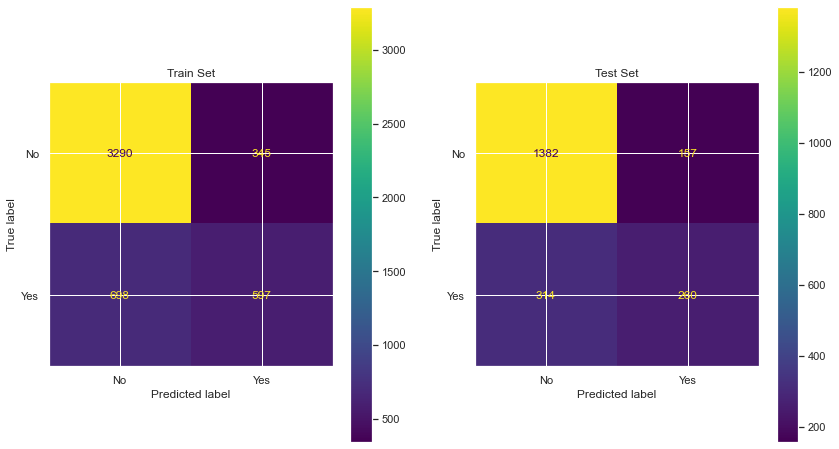

In [135]:
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt,pos_label="Yes")]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

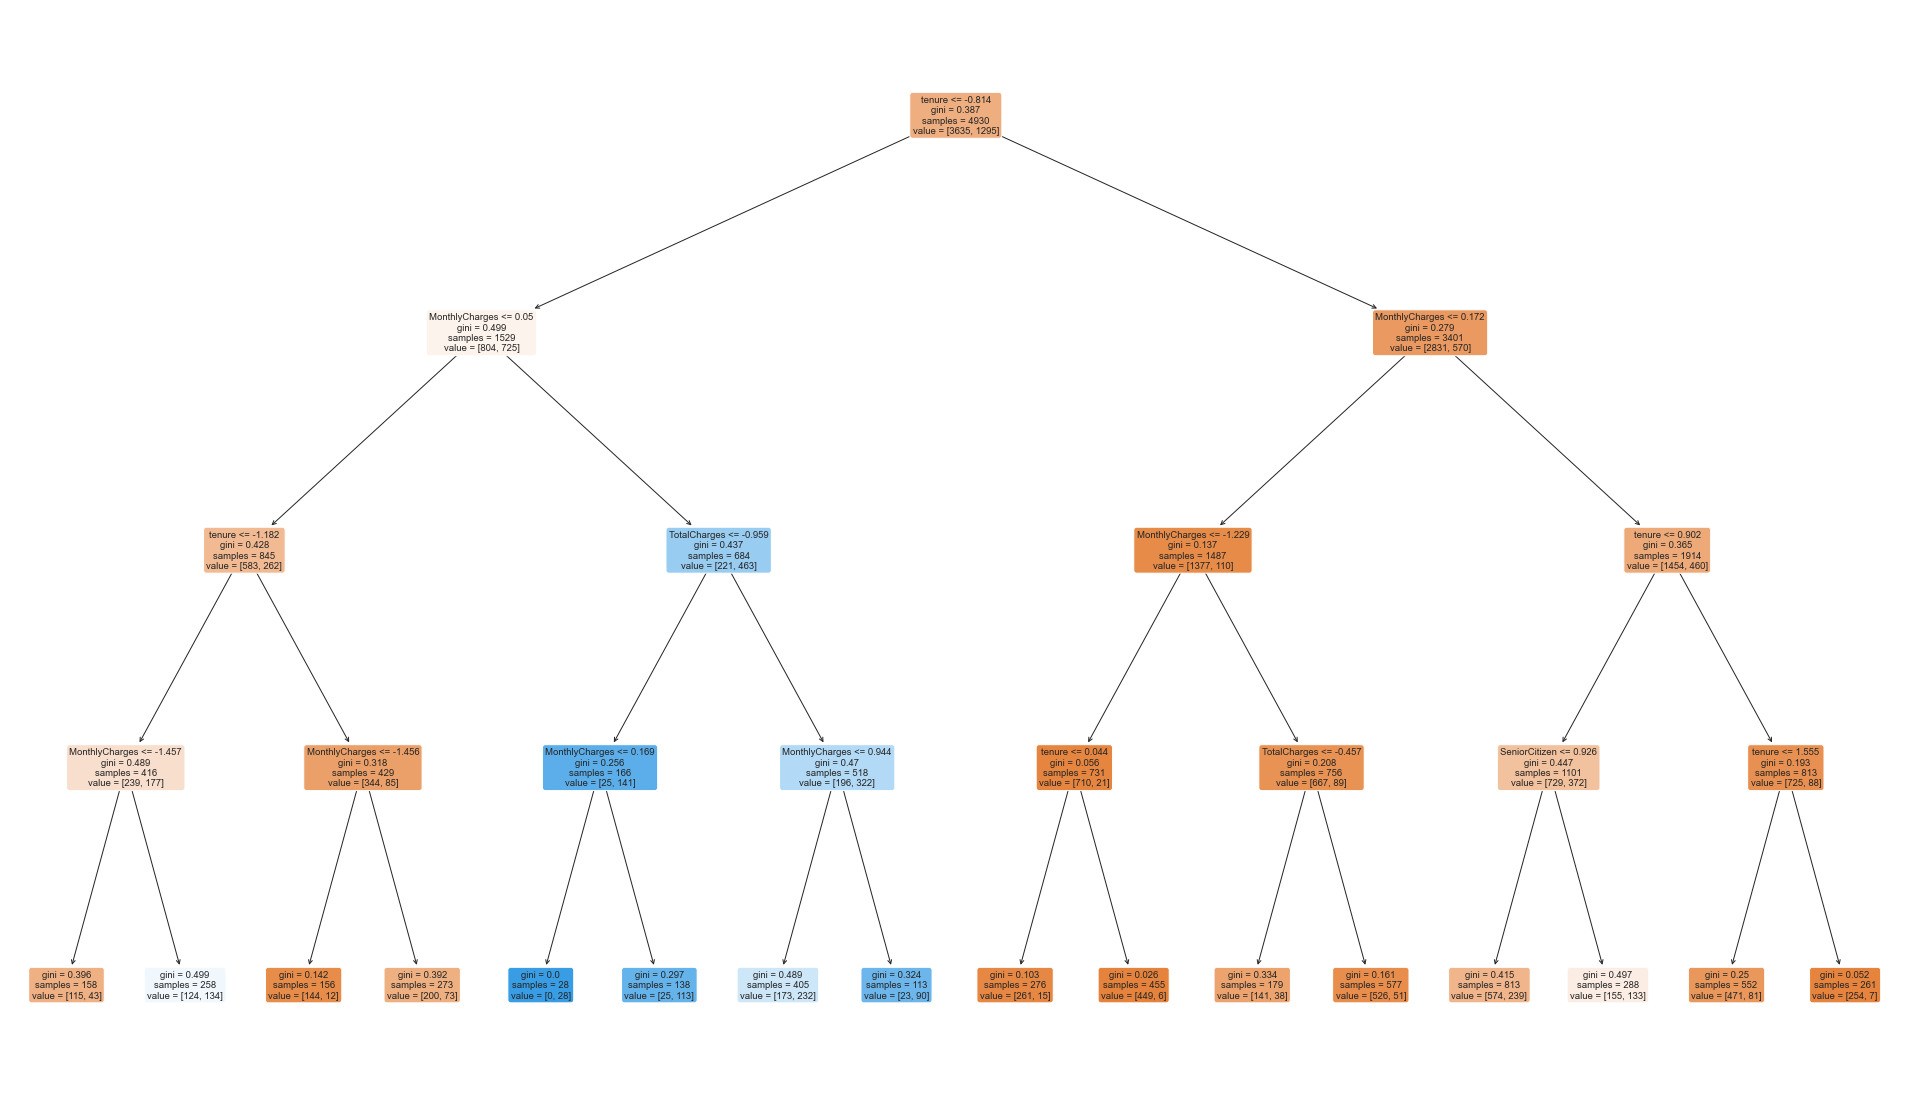

In [136]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [131]:
cat_dummy=pd.get_dummies(df.select_dtypes("object"),drop_first=True)

In [133]:
df_dummy=pd.concat((X,cat_dummy),axis=1)

In [134]:
df_dummy

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,1,0,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,2,0,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,45,0,42.30,1840.75,1,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,2,0,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,1,0,1,1,0,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,...,1,0,0,0,1,0,1,1,0,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Three classification models

logistic regression

KNN classifier

Decision tree classifier

# Thursday imbalanced data

apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.

In [138]:
df_dummy

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,1,0,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,2,0,53.85,108.15,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,45,0,42.30,1840.75,1,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,2,0,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,0,1,0,1,1,0,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,...,1,0,0,0,1,0,1,1,0,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [141]:
df_dummy['Churn_Yes'].value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

The data is here unbalanced, so we can either upsample or downsample. Here I choose to Upsample. Here from google:

Which one you should use (up or down)? It depends on the level of certainty you need. If you don't need mathematical certainty and just want a heuristic, downsampling is faster and upsampling is more accurate.

In [175]:
X=df_dummy.drop(['Churn_Yes'], axis=1)
y=df_dummy['Churn_Yes']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [177]:
smote = SMOTE()

In [178]:
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0    4138
1    4138
Name: Churn_Yes, dtype: int64

In [179]:
X.shape

(7043, 22)

In [180]:
y.shape

(7043,)

In [181]:


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [185]:
print("The accuracy of determination for the test data is=%.2f"
      %(model.score(X_test, y_test)))
print("The accuracy of determination for the train data is=%.2f"
      %(model.score(X_train, y_train)))

The accuracy of determination for the test data is=0.72
The accuracy of determination for the train data is=1.00


In [183]:
scores=cross_val_score(model, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.70591787 0.71238671 0.8326284  0.81087613 0.85800604]
Score stats: 0.78 accuracy with a standard deviation of 0.06
